In [1]:
import pims

def import_dataset(name_folder):
    """
    Imports and cleans up the data files in the name directory (removes
    incompletely scanned frames) and exports the resulting file as a
    TIFF file along with the relevant metadata. All files are exported
    to a "preprocessed_data" folder in the name folder (created if it
    does not already exist).
    
    :param str name_folder: Path to name folder containing data files.
    :return: 
    """
    

In [126]:
import pims
import glob
import numpy as np

In [115]:
trim_series = False

In [116]:
name_folder = 'test_data/2023-04-07/p2pdp_zld-sites-ctrl_fwd_1'
dataset_name = name_folder.split('/')[-1]
file_path = ''.join([name_folder, '/', dataset_name, '*'])
file_list = glob.glob(file_path)

In [117]:
# We pull the individual data files into a list as pipeline objects. Pulling
# the metadata is deferred until the concatenation step since it forces a read
# from disk.
data = []
num_frames_series = []

for file in file_list:
    series = pims.Bioformats(file)
    series.bundle_axes = 'tczyx'
    data.append(series)

    num_frames_series.append((series.shape)[1])

num_frames_series = np.array(num_frames_series) # Numpy array more convenient
                                                # for later slicing

In [118]:
num_frames = np.sum(num_frames_series)
num_series = num_frames_series.size
if trim_series:
    num_frames = num_frames - num_series
    num_frames_series = num_frames_series - 1
    end = -1
else:
    end = None

series_shape = data[0].shape
dataset_shape = (num_frames, series_shape[2], series_shape[3], series_shape[4],
                series_shape[5])
full_dataset = np.empty(dataset_shape)

series_start = 0
for i, _ in enumerate(data):
    series_end = series_start + num_frames_series[i]
    full_dataset[series_start:series_end] = data[i][0][:end]

    series_start = series_end

In [119]:
full_dataset.shape

(171, 2, 21, 256, 512)

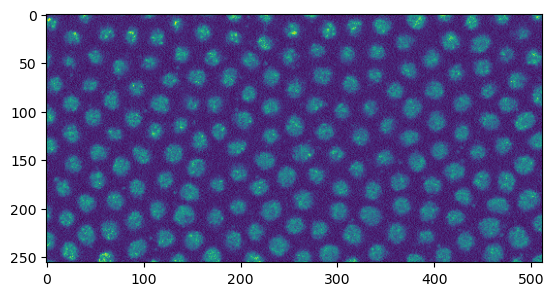

In [114]:
plt.imshow(full_dataset[100, 1, 10])

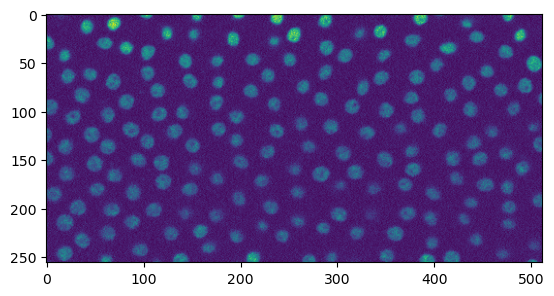

In [16]:
import matplotlib.pyplot as plt
plt.imshow(data[3][0][50][1][12])

In [129]:
data[0].metadata

<MetadataRetrieve> Available loci.formats.meta.MetadataRetrieve functions: ChannelAnnotationRefCount, ChannelColor, ChannelCount, ChannelID, ChannelName, ChannelPinholeSize, ChannelSamplesPerPixel, DatasetCount, DetectorAmplificationGain, DetectorAnnotationRefCount, DetectorCount, DetectorGain, DetectorID, DetectorSettingsID, DetectorType, DetectorZoom, DichroicAnnotationRefCount, DichroicCount, DichroicID, DichroicModel, ExperimentCount, ExperimenterAnnotationRefCount, ExperimenterCount, ExperimenterGroupCount, ExperimenterID, ExperimenterUserName, FilterCount, FilterSetCount, FolderCount, ImageAcquisitionDate, ImageAnnotationRefCount, ImageCount, ImageDescription, ImageID, ImageInstrumentRef, ImageName, ImageROIRefCount, InstrumentAnnotationRefCount, InstrumentCount, InstrumentID, LaserID, LaserLaserMedium, LaserModel, LaserType, LaserWavelength, LightPathAnnotationRefCount, LightPathEmissionFilterRefCount, LightPathExcitationFilterRefCount, LightSourceAnnotationRefCount, LightSource

In [155]:
data[0].metadata.PixelsSizeT(0)

5

## To-do
- Add metadata handling bit (grab relevant info using pipeline object, then use frame-by-frame for time).
    - Might be useful to make it so we can easily choose extra metadata to track throughout the imaging.